# **Dataset 1:** money

# **XÂY DỰNG MÔ HÌNH**

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img, img_to_array, to_categorical

folder = '/content/drive/MyDrive/AI_dataset_money/'
photos, labels = list(), list()

for file in listdir(folder):
    output = 0
    if file.startswith('1k'): 
        output = 1
    if file.startswith('5k'):
        output = 2
    if file.startswith('20k'):  
        output = 3
    if file.startswith('50k'): 
        output = 4
    if file.startswith('100k'):  
        output = 5
    if file.startswith('500k'):  
        output = 6

    photo = load_img(folder+file,target_size=(32,32))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos) 
labels = asarray(labels) 
labels = to_categorical(labels) 
print('X size:', photos.shape,'\ny size:' , labels.shape)
save('imgs.npy',photos)
save('labels.npy',labels)

X size: (398, 32, 32, 3) 
y size: (398, 7)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.load('imgs.npy')
y = np.load('labels.npy')
x = x.reshape(398, 32, 32, 3)
x = x.astype('float32')/255

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=1)

print('x train:', x_train.shape, '\ny train:', y_train.shape)
print('x test:', x_test.shape, '\ny test:', y_test.shape)

x train: (318, 32, 32, 3) 
y train: (318, 7)
x test: (80, 32, 32, 3) 
y test: (80, 7)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,LeakyReLU

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))

from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1)
model.summary()

Epoch 1/50
5/5 [==============================] - 1s 8ms/step - loss: 1.9315 - accuracy: 0.1730
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 1.8392 - accuracy: 0.1761
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 1.8073 - accuracy: 0.2107
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 1.7924 - accuracy: 0.2233
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 1.7526 - accuracy: 0.2893
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 1.7126 - accuracy: 0.3019
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 1.6700 - accuracy: 0.2925
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 1.6141 - accuracy: 0.3208
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 1.4860 - accuracy: 0.4277
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 1.4302 - accuracy: 0.3868
Epoch 11/50
5/5 [======================

# **TÍNH TOÁN ĐỘ CHÍNH XÁC**

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('accuracy:', acc, '\nloss:', loss)

3/3 [==============================] - 0s 5ms/step - loss: 0.5535 - accuracy: 0.8125
accuracy: 0.8125 
loss: 0.5534671545028687


In [ ]:
model.save('model_money_81percent.h5')

# **DỰ ĐOÁN ẢNH BẰNG ẢNH NGOÀI TỰ TẢI LÊN**

1/1 [==============================] - 0s 74ms/step
Predicted label: 100k vnd


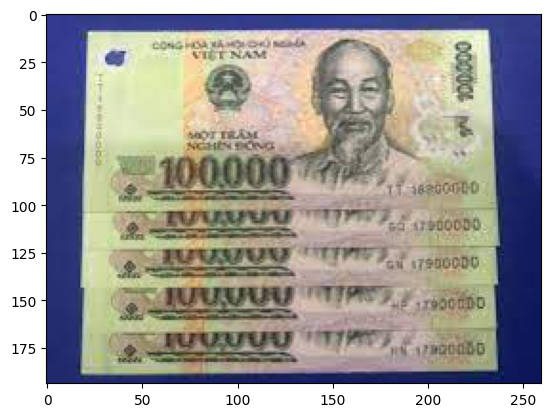

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

my_dict = {1:'1k vnd', 2:'5k vnd', 3:'20k vnd', 4:'50k vnd', 5:'100k vnd', 6:'100k vnd'}

uploaded_imgs = '100k_up.jpg'
model = load_model('model_money_81percent.h5')

# Load the image
img = Image.open(uploaded_imgs).convert('RGB')
# print uploaded image
plt.imshow(img)
# convert it to a numpy array
img = img.resize((32,32))
img_arr = np.array(img)
img_arr = img_arr.reshape((1,) + img_arr.shape)
img_arr = img_arr.astype('float32')/255
# Perform prediction on the image
prediction = model.predict(img_arr)
# Get the label with the highest probability
label = np.argmax(prediction)
print('Predicted label:', my_dict[label])